In [1]:
from mywebstyle import plot_style
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import kaggle
plot_style('#f4f4f4')
loandata = pd.read_csv('lending_club_loan_two.csv')
first_13_cols = loandata.iloc[:, :13]
first_13_cols.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-14,Fully Paid
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-13,Charged Off


In [2]:
second_13_cols = loandata.iloc[:, 13:]
second_13_cols.head()

,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,vacation,Vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395900 entries, 0 to 395899
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395900 non-null  int64  
 1   term                  395900 non-null  object 
 2   int_rate              395900 non-null  float64
 3   installment           395900 non-null  float64
 4   grade                 395900 non-null  object 
 5   sub_grade             395900 non-null  object 
 6   emp_title             372982 non-null  object 
 7   emp_length            377608 non-null  object 
 8   home_ownership        395900 non-null  object 
 9   annual_inc            395900 non-null  float64
 10  verification_status   395900 non-null  object 
 11  issue_d               395900 non-null  object 
 12  loan_status           395900 non-null  object 
 13  purpose               395900 non-null  object 
 14  title                 394145 non-null  object 
 15  

<Axes: >

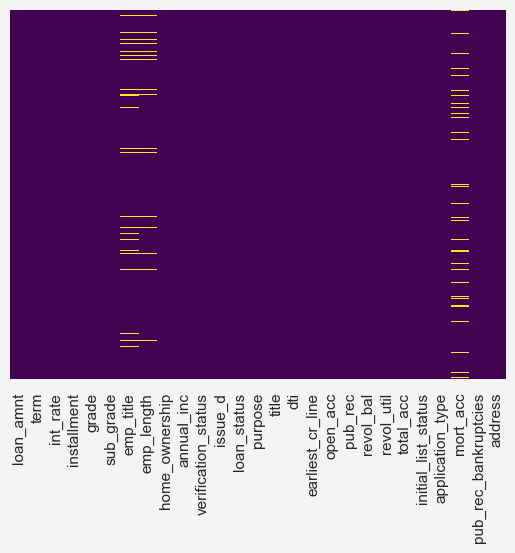

In [4]:
sns.heatmap(loandata.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
loandata.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395900.0,14114.249305,8357.637338,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,395900.0,13.639385,4.472112,5.32,10.49,13.33,16.49,30.99
installment,395900.0,431.859947,250.733444,16.08,250.33,375.43,567.30,1533.81
annual_inc,395900.0,74206.819251,61645.032777,0.00,45000.00,64000.00,90000.00,8706582.00
dti,395900.0,17.379187,18.021550,0.00,11.28,16.91,22.98,9999.00
open_acc,395900.0,11.311081,5.137591,0.00,8.00,10.00,14.00,90.00
pub_rec,395900.0,0.178204,0.530716,0.00,0.00,0.00,0.00,86.00
revol_bal,395900.0,15844.331435,20589.846553,0.00,6026.00,11181.00,19620.00,1743266.00
revol_util,395624.0,53.793449,24.452575,0.00,35.80,54.80,72.90,892.30
total_acc,395900.0,25.414622,11.887279,2.00,17.00,24.00,32.00,151.00


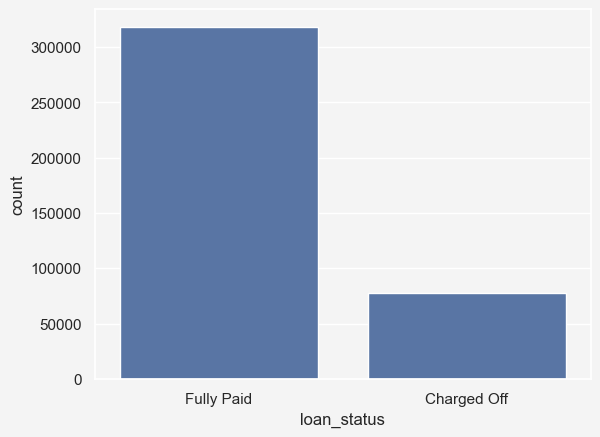

In [6]:
sns.countplot(x='loan_status', data=loandata)
fp = np.round(
    len(loandata[loandata['loan_status'] == 'Fully Paid'])/len(loandata)*100, 2
)

co = np.round(
    len(loandata[loandata['loan_status'] == 'Charged Off']) /
    len(loandata)*100, 2
)

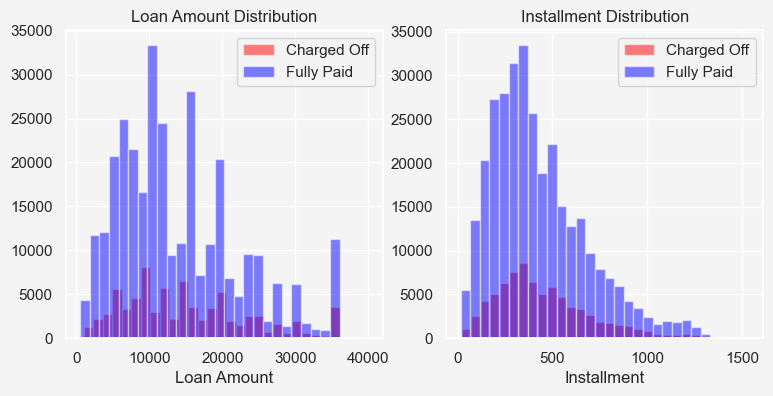

In [7]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
loandata[loandata['loan_status'] == 'Charged Off']['loan_amnt'].hist(
    alpha=0.5, color='red', bins=30, ax=ax1,
    label='Charged Off'
)
loandata[loandata['loan_status'] == 'Fully Paid']['loan_amnt'].hist(
    alpha=0.5, color='blue', bins=30, ax=ax1,
    label='Fully Paid'
)
ax1.set_title('Loan Amount Distribution')
ax1.set_xlabel('Loan Amount')
ax1.legend()

ax2 = fig.add_subplot(122)
loandata[loandata['loan_status'] == 'Charged Off']['installment'].hist(
    alpha=0.5, color='red', bins=30, ax=ax2,
    label='Charged Off'
)
loandata[loandata['loan_status'] == 'Fully Paid']['installment'].hist(
    alpha=0.5, color='blue', bins=30, ax=ax2,
    label='Fully Paid'
)
ax2.set_title('Installment Distribution')
ax2.set_xlabel('Installment')
ax2.legend()

Text(0.5, 1.0, 'Installment Boxplot')

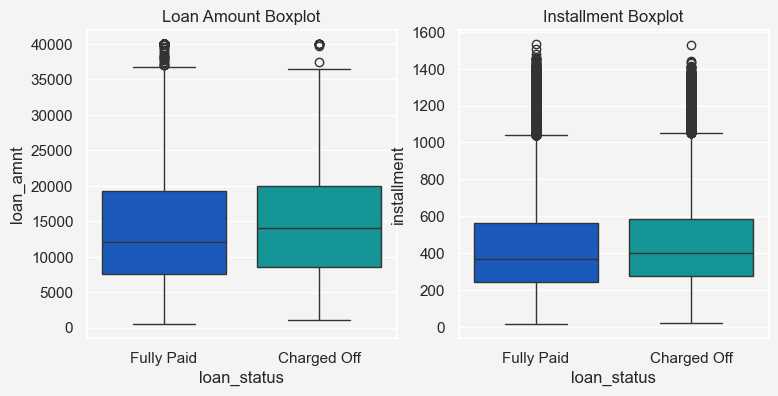

In [8]:
fig = plt.figure(figsize=(8.8, 4))
ax1 = fig.add_subplot(121)
sns.boxplot(
    x='loan_status', y='loan_amnt', hue='loan_status',
    data=loandata, ax=ax1, palette='winter'
)
ax1.set_title('Loan Amount Boxplot')

ax2 = fig.add_subplot(122)
sns.boxplot(
    x='loan_status', y='installment', hue='loan_status',
    data=loandata, ax=ax2, palette='winter'
)
ax2.set_title('Installment Boxplot')

<Axes: xlabel='loan_status', ylabel='count'>

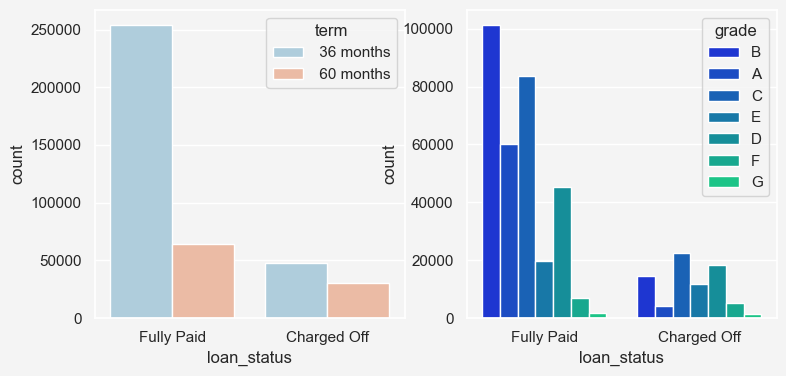

In [9]:
fig = plt.figure(figsize=(8.8, 4))
ax1 = fig.add_subplot(121)
sns.countplot(
    x='loan_status',
    hue='term', data=loandata,
    palette='RdBu_r', ax=ax1
)
ax2 = fig.add_subplot(122)
sns.countplot(
    x='loan_status',
    hue='grade', data=loandata,
    palette='winter', ax=ax2
)

<Axes: xlabel='sub_grade', ylabel='Count'>

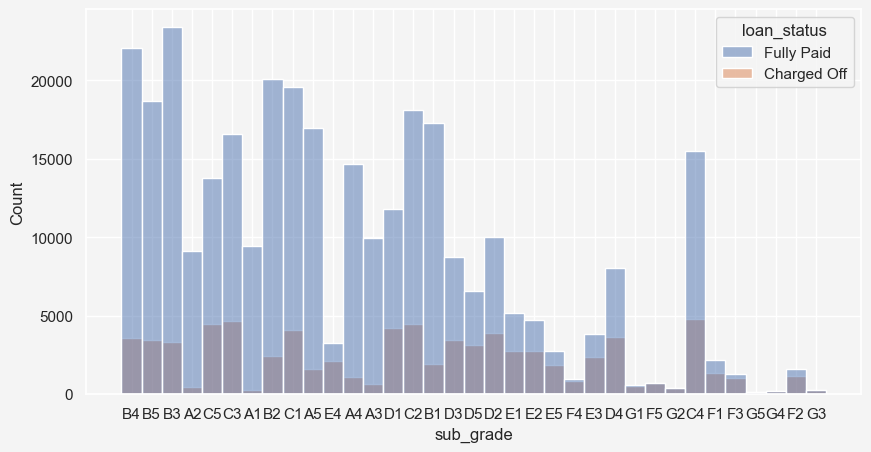

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='sub_grade', hue='loan_status', data=loandata, ax=ax)

In [11]:
loandata['emp_title'] = loandata['emp_title'].str.lower()
loandata.emp_title.value_counts()[:25]

emp_title
manager                     5635
teacher                     5426
registered nurse            2626
supervisor                  2589
sales                       2381
driver                      2306
owner                       2200
rn                          2072
project manager             1776
office manager              1638
general manager             1460
truck driver                1288
director                    1192
engineer                    1187
police officer              1041
vice president               961
sales manager                961
operations manager           960
store manager                941
president                    877
administrative assistant     865
accountant                   845
account manager              845
technician                   839
mechanic                     753
Name: count, dtype: int64

<Axes: xlabel='emp_length_group', ylabel='count'>

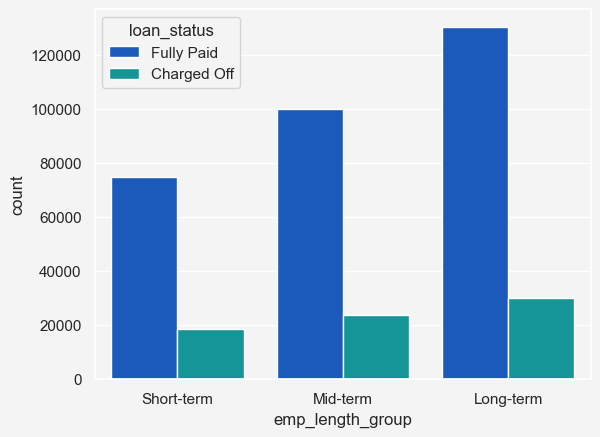

In [13]:
pd.set_option('future.no_silent_downcasting', True)
loandata['emp_length'] = loandata['emp_length'].replace({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
).infer_objects(copy=False)

loandata['emp_length_group'] = pd.cut(
    loandata['emp_length'],
    bins=[-1, 2, 7, 10],  # Bins: <3 years, 3-7 years, > 7 years
    labels=['Short-term', 'Mid-term', 'Long-term']
)

sns.countplot(
    x='emp_length_group',
    hue='loan_status',
    data=loandata,
    palette='winter',
    stat='count'
)

<Axes: xlabel='home_ownership', ylabel='count'>

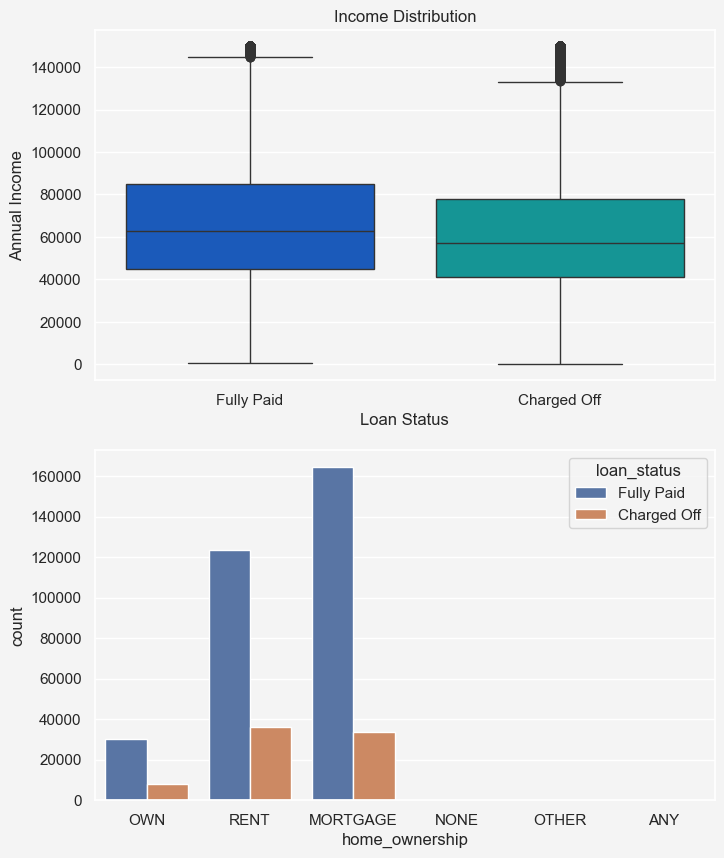

In [ ]:
fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(211)
annual_income_threshod = loandata['annual_inc'].quantile(0.95)
filtered_income = loandata[loandata['annual_inc'] <= annual_income_threshod]
sns.boxplot(
    x='loan_status', y='annual_inc',
    hue='loan_status', palette='winter',
    data=filtered_income, ax=ax1
)
ax1.set_title('Income Distribution')
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Annual Income')

ax2 = fig.add_subplot(212)
sns.countplot(
    x='home_ownership', hue='loan_status',
    data=loandata, ax=ax2
)

<Axes: xlabel='verification_status', ylabel='count'>

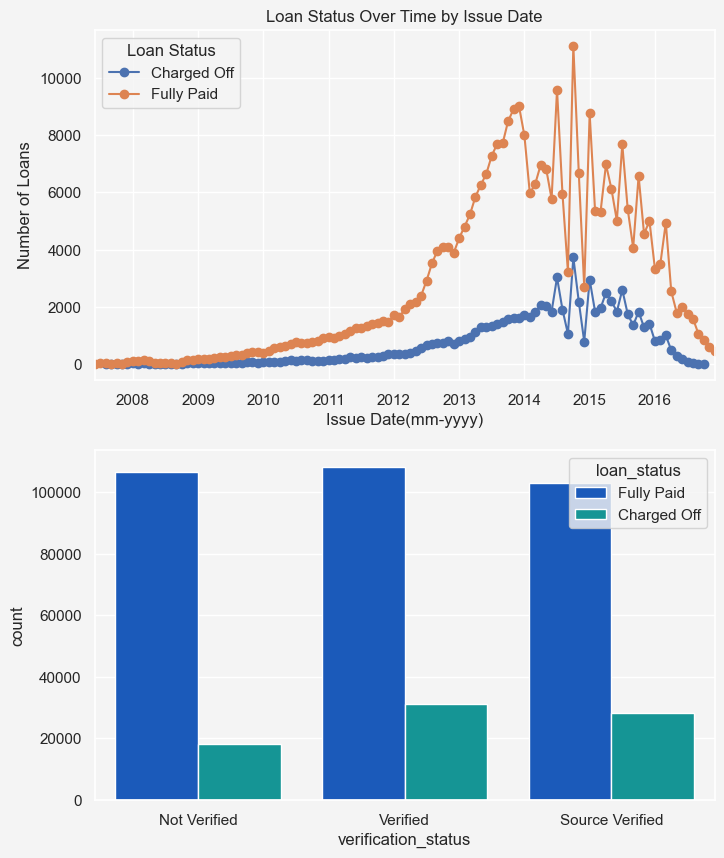

In [15]:
loandata['issue_d'] = pd.to_datetime(
    loandata['issue_d'], format='%b-%y'
)
loandata = loandata.sort_values('issue_d')
loan_status_trend = loandata.groupby(
    ['issue_d', 'loan_status']).size().unstack()

fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(211)
loan_status_trend.plot(
    kind='line', marker='o', ax=ax1
)
ax1.set_title('Loan Status Over Time by Issue Date')
ax1.set_xlabel('Issue Date(mm-yyyy)')
ax1.set_ylabel('Number of Loans')
ax1.legend(title='Loan Status')

ax2 = fig.add_subplot(212)
sns.countplot(
    x='verification_status', hue='loan_status',
    data=loandata, palette='winter', ax=ax2
)

In [16]:
loandata['purpose'].value_counts()

purpose
debt_consolidation    234420
credit_card            82998
home_improvement       24024
other                  21177
major_purchase          8788
small_business          5701
car                     4696
medical                 4194
moving                  2853
vacation                2452
house                   2201
wedding                 1811
renewable_energy         328
educational              257
Name: count, dtype: int64

Text(0.5, 1.0, 'Debt-to-Income Ratio on Loan Status')

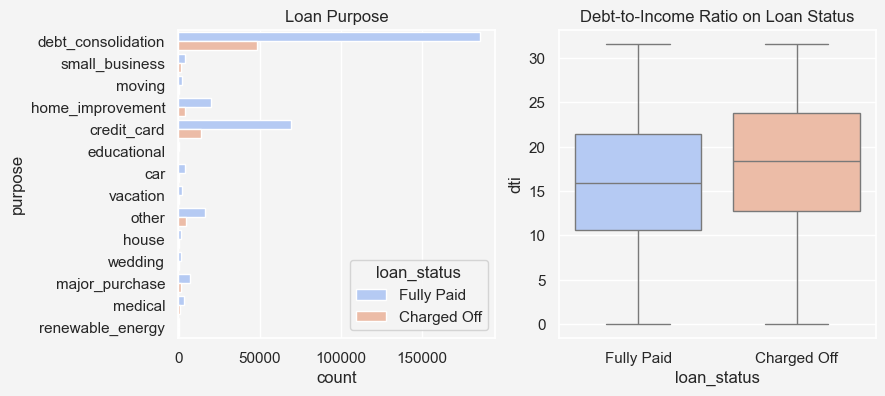

In [31]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
sns.countplot(
    y='purpose', hue='loan_status',
    data=loandata, palette='coolwarm'
)
ax1.set_title('Loan Purpose')

ax2 = fig.add_subplot(122)
dti_threshold = loandata['dti'].quantile(0.95)
filtereddata = loandata[loandata['dti'] <= dti_threshold]

sns.boxplot(
    x='loan_status', y='dti',
    hue='loan_status', data=filtereddata,
    palette='coolwarm', ax=ax2
)
ax2.set_title('Debt-to-Income Ratio on Loan Status')

<p style="text-align: justify">
**Insights:** From the purpose column, we see that most of the loans that were charged off were used to make debt consolidation. Therefore, debt consolidation may have been a significant factor when a loan is charged off. Another insight we obtain from the debt-to-income ratio is that the charged off loans have higher dti ratio
</p>

Text(0.5, 0, 'Public Records')

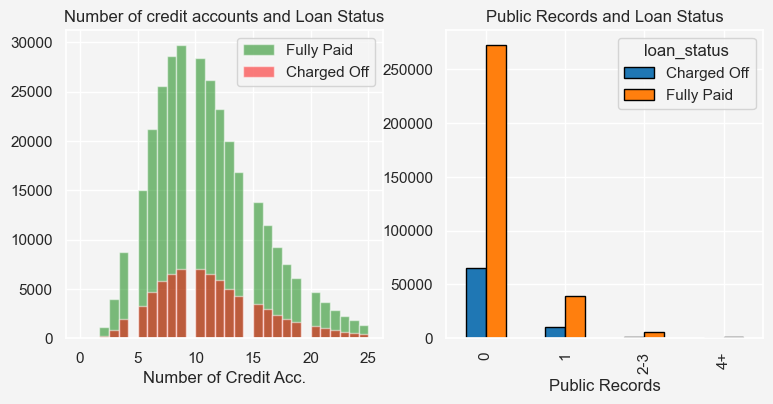

In [ ]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
filtered_open_account_threshold = loandata['open_acc'].quantile(0.98)
filtered_open_account = loandata[loandata['open_acc']
                                 <= filtered_open_account_threshold]
filtered_open_account[filtered_open_account['loan_status'] == 'Fully Paid']['open_acc'].hist(
    alpha=0.5, color='green', bins=30, label='Fully Paid', ax=ax1
)
filtered_open_account[filtered_open_account['loan_status'] == 'Charged Off']['open_acc'].hist(
    alpha=0.5, color='red', bins=30, label='Charged Off', ax=ax1
)
ax1.set_xlabel('Number of Credit Acc.')
ax1.legend()
ax1.set_title('Number of credit accounts and Loan Status')

loandata['pub_rec_group'] = pd.cut(
    loandata['pub_rec'], bins=[-1, 0, 1, 3, loandata['pub_rec'].max()],
    labels=['0', '1', '2-3', '4+']
)
loan_status_by_pub_rec = loandata.groupby(
    ['pub_rec_group', 'loan_status'], observed=False
).size().unstack()

ax2 = fig.add_subplot(122)
loan_status_by_pub_rec.plot(
    kind='bar', stacked=False, edgecolor='black',
    color=['#1f77b4', '#ff7f0e'], ax=ax2
)
ax2.set_title('Public Records and Loan Status')
ax2.set_xlabel('Public Records')

<Axes: xlabel='loan_status', ylabel='open_acc'>

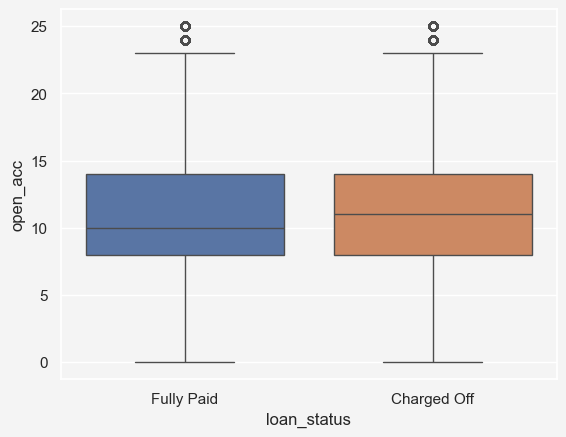

In [65]:
sns.boxplot(
    y='open_acc', x='loan_status',
    hue='loan_status',
    data=filtered_open_account
)

<p style="text-align: justify">
</p>

<p style="text-align: justify">
**Insights:** Number of credit account seems normally distributed among both groups except for some outliers. However, the mean number of credit accounts are slightly higher for the charged off category than the fully paid category. So, higher credit account has some sort of relation with loan being charged off. Also, people who doesn't have any public record seems to have higher chance of loan status being charged off
</p>

<Axes: xlabel='loan_status', ylabel='revol_bal'>

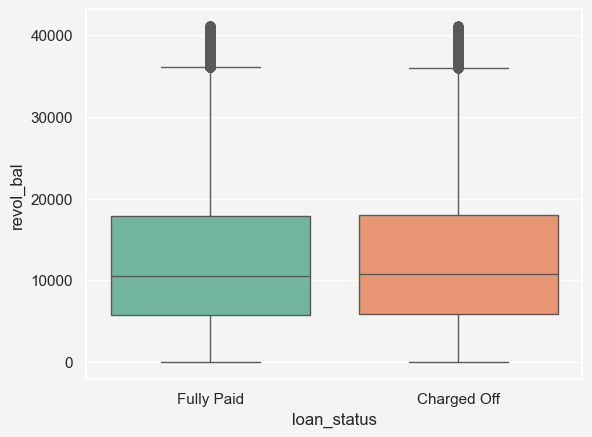

In [ ]:
revol_bal_threshold = loandata['revol_bal'].quantile(0.95)
filtered_revol_bal = loandata[loandata['revol_bal'] <= revol_bal_threshold]
sns.boxplot(
    x='loan_status', y='revol_bal',
    data=filtered_revol_bal, hue='loan_status',
    palette='Set2'
)

<Axes: xlabel='loan_status', ylabel='revol_util'>

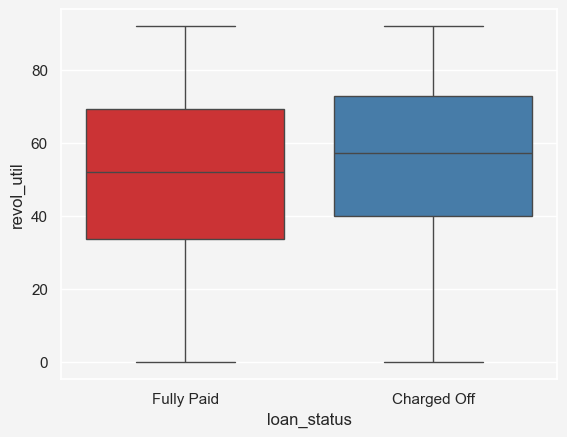

In [ ]:
revol_util_threshold = loandata['revol_util'].quantile(0.95)
filtered_revol_util = loandata[loandata['revol_util'] <= revol_util_threshold]
sns.boxplot(
    x='loan_status', y='revol_util',
    hue='loan_status', data=filtered_revol_util,
    palette='Set1'
)

Text(0.5, 1.0, 'Revolving Utilization vs Loan Status')

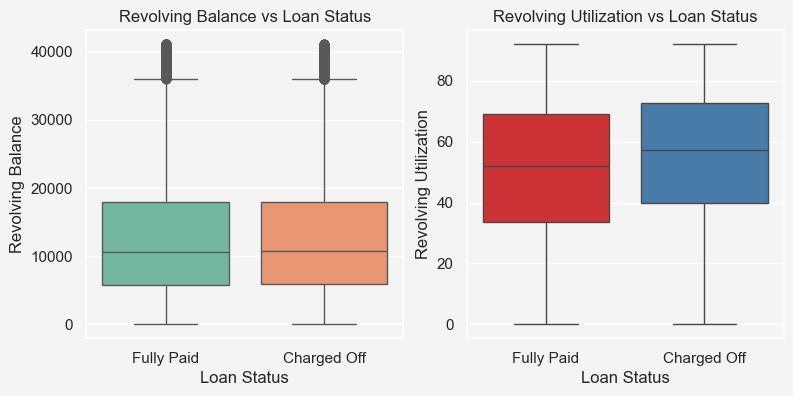

In [ ]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
revol_bal_threshold = loandata['revol_bal'].quantile(0.95)
filtered_revol_bal = loandata[loandata['revol_bal'] <= revol_bal_threshold]
sns.boxplot(
    x='loan_status', y='revol_bal',
    data=filtered_revol_bal, hue='loan_status',
    palette='Set2', ax=ax1
)
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Revolving Balance')
ax1.set_title('Revolving Balance vs Loan Status')

ax2 = fig.add_subplot(122)
revol_util_threshold = loandata['revol_util'].quantile(0.95)
filtered_revol_util = loandata[loandata['revol_util'] <= revol_util_threshold]
sns.boxplot(
    x='loan_status', y='revol_util',
    hue='loan_status', data=filtered_revol_util,
    palette='Set1', ax=ax2
)
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('Revolving Utilization')
ax2.set_title('Revolving Utilization vs Loan Status')

In [78]:
loandata['total_acc'].value_counts()

total_acc
21     14274
22     14255
20     14220
23     13915
24     13874
       ...  
151        1
104        1
135        1
108        1
115        1
Name: count, Length: 118, dtype: int64

Text(0.5, 0, 'Initial Status (Funded or Withdrawn)')

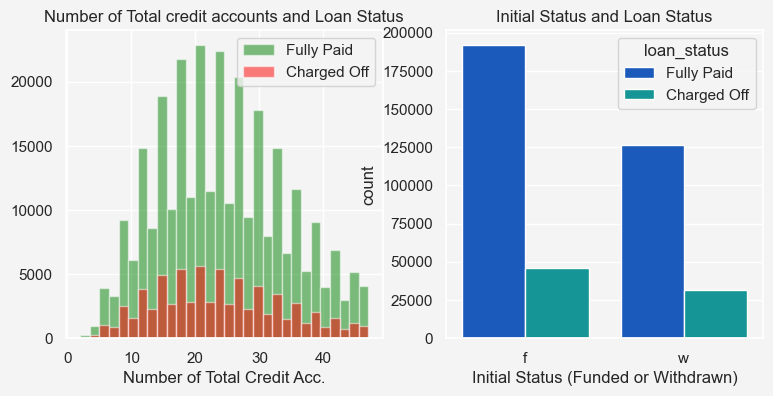

In [ ]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
filtered_total_account_threshold = loandata['total_acc'].quantile(0.95)
filtered_total_account = loandata[loandata['total_acc']
                                  <= filtered_total_account_threshold]
filtered_total_account[filtered_total_account['loan_status'] == 'Fully Paid']['total_acc'].hist(
    alpha=0.5, color='green', bins=30, label='Fully Paid', ax=ax1
)
filtered_total_account[filtered_total_account['loan_status'] == 'Charged Off']['total_acc'].hist(
    alpha=0.5, color='red', bins=30, label='Charged Off', ax=ax1
)
ax1.set_xlabel('Number of Total Credit Acc.')
ax1.legend()
ax1.set_title('Number of Total credit accounts and Loan Status')


ax2 = fig.add_subplot(122)
sns.countplot(
    x='initial_list_status', hue='loan_status',
    data=loandata, palette='winter'
)
ax2.set_title('Initial Status and Loan Status')
ax2.set_xlabel('Initial Status (Funded or Withdrawn)')

<Axes: xlabel='loan_status', ylabel='total_acc'>

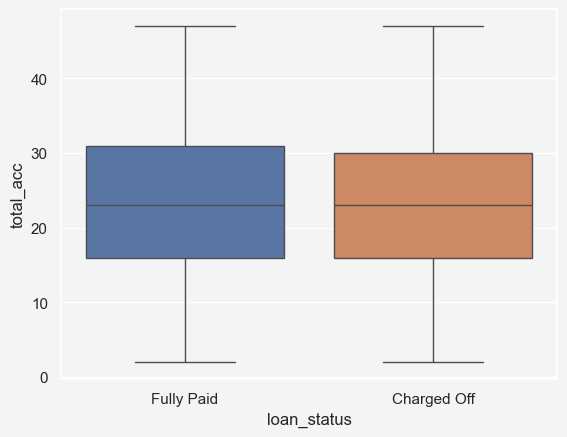

In [81]:
sns.boxplot(
    y='total_acc', x='loan_status',
    hue='loan_status',
    data=filtered_total_account
)

In [82]:
loandata['application_type'].value_counts()

application_type
INDIVIDUAL    395189
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [83]:
loandata['mort_acc'].value_counts()

mort_acc
0.0     139727
1.0      60392
2.0      49931
3.0      38040
4.0      27880
5.0      18188
6.0      11067
7.0       6050
8.0       3121
9.0       1655
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
25.0         4
21.0         4
27.0         3
23.0         2
31.0         2
32.0         2
26.0         2
34.0         1
30.0         1
28.0         1
Name: count, dtype: int64

In [ ]:
mort_acc_summary = loandata.groupby('loan_status')['mort_acc'].describe()
print(mort_acc_summary)

                count      mean       std  min  25%  50%  75%   max
loan_status                                                        
Charged Off   72103.0  1.501214  1.974335  0.0  0.0  1.0  2.0  23.0
Fully Paid   286014.0  1.892967  2.182550  0.0  0.0  1.0  3.0  34.0


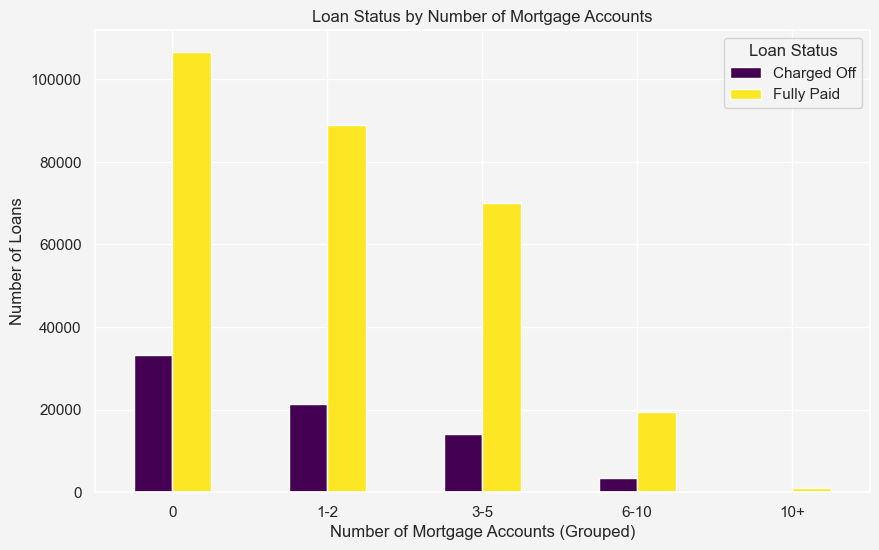

In [ ]:
# Bin the mort_acc column into categories
loandata['mort_acc_group'] = pd.cut(
    loandata['mort_acc'], bins=[-1, 0, 2, 5, 10, loandata['mort_acc'].max()],
    labels=['0', '1-2', '3-5', '6-10', '10+']
)

# Plot the grouped bar chart
mort_acc_counts = loandata.groupby(
    ['mort_acc_group', 'loan_status'], observed=False
).size().unstack()

mort_acc_counts.plot(kind='bar', stacked=False,
                     figsize=(10, 6), colormap='viridis')
plt.title('Loan Status by Number of Mortgage Accounts')
plt.xlabel('Number of Mortgage Accounts (Grouped)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

In [89]:
loandata['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350265
1.0     42776
2.0      1846
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

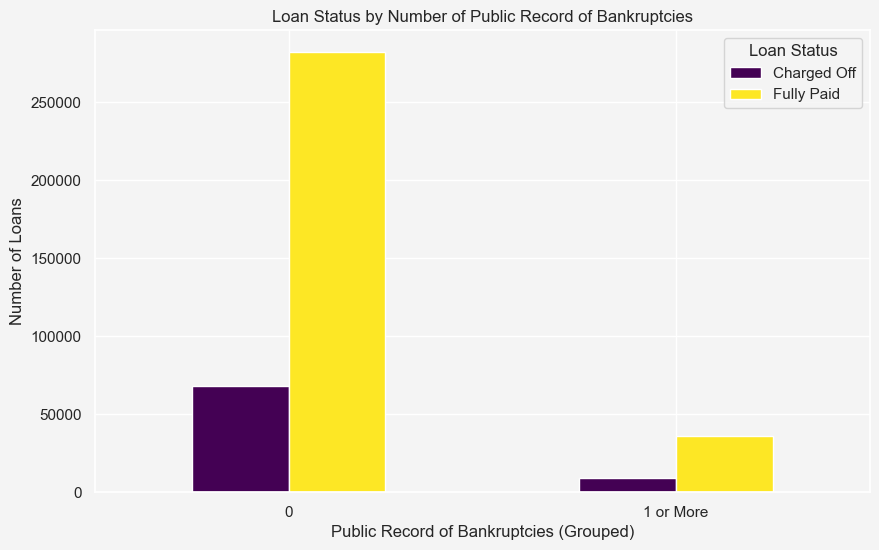

In [ ]:
loandata['pub_rec_bankruptcies_group'] = pd.cut(
    loandata['pub_rec_bankruptcies'], bins=[-1, 0,
                                            loandata['pub_rec_bankruptcies'].max()],
    labels=['0', '1 or More']
)

# Plot the grouped bar chart
pub_rec_bankruptcies_counts = loandata.groupby(
    ['pub_rec_bankruptcies_group', 'loan_status'], observed=False
).size().unstack()

pub_rec_bankruptcies_counts.plot(
    kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.title('Loan Status by Number of Public Record of Bankruptcies')
plt.xlabel('Public Record of Bankruptcies (Grouped)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

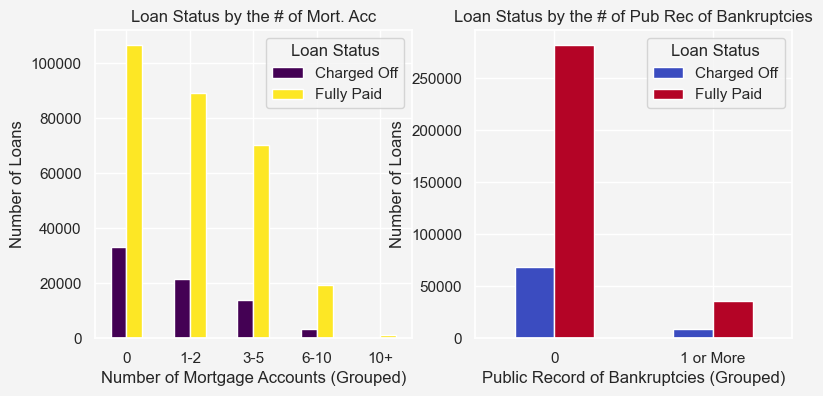

In [ ]:
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(121)

loandata['mort_acc_group'] = pd.cut(
    loandata['mort_acc'], bins=[-1, 0, 2, 5, 10, loandata['mort_acc'].max()],
    labels=['0', '1-2', '3-5', '6-10', '10+']
)

mort_acc_counts = loandata.groupby(
    ['mort_acc_group', 'loan_status'], observed=False
).size().unstack()

mort_acc_counts.plot(
    kind='bar', stacked=False,
    colormap='viridis', ax=ax1
)
ax1.set_title('Loan Status by the # of Mort. Acc')
ax1.set_xlabel('Number of Mortgage Accounts (Grouped)')
ax1.set_ylabel('Number of Loans')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Loan Status')

ax2 = fig.add_subplot(122)

loandata['pub_rec_bankruptcies_group'] = pd.cut(
    loandata['pub_rec_bankruptcies'], bins=[-1, 0,
                                            loandata['pub_rec_bankruptcies'].max()],
    labels=['0', '1 or More']
)

# Plot the grouped bar chart
pub_rec_bankruptcies_counts = loandata.groupby(
    ['pub_rec_bankruptcies_group', 'loan_status'], observed=False
).size().unstack()

pub_rec_bankruptcies_counts.plot(
    kind='bar', stacked=False,
    colormap='coolwarm', ax=ax2
)
ax2.set_title('Loan Status by the # of Pub Rec of Bankruptcies')
ax2.set_xlabel('Public Record of Bankruptcies (Grouped)')
ax2.set_ylabel('Number of Loans')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Loan Status')
plt.show()

In [103]:
loandata['application_type'].value_counts()

application_type
INDIVIDUAL    395189
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

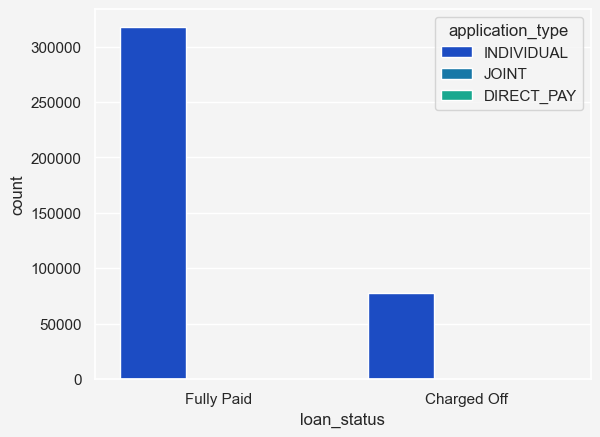

In [105]:
sns.countplot(
    x='loan_status', hue= 'application_type', 
    data=loandata, palette='winter'
)

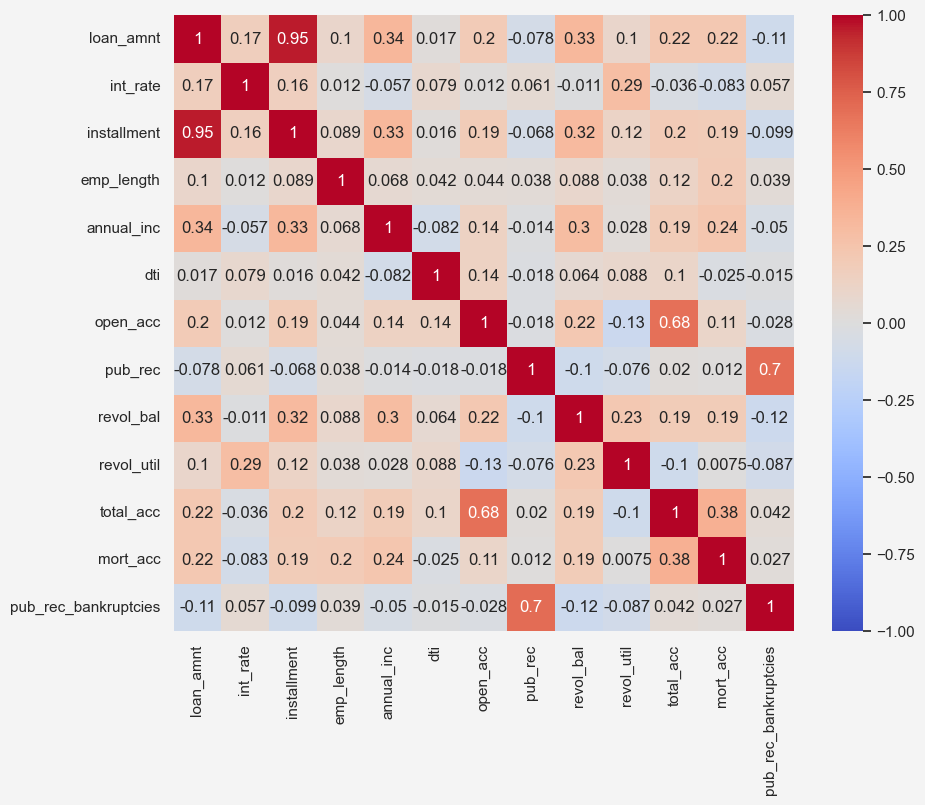

In [110]:
numeric_loandata = loandata.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_loandata.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()